# 데이터 준비

In [25]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [27]:
print((train_input.shape, train_target.shape))

((60000, 28, 28), (60000,))


In [28]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


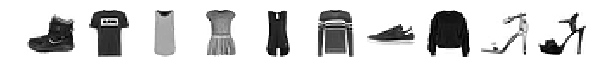

In [29]:
#그림으로 훈련데이터 샘플 보자
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10, figsize = (10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap = 'gray_r')
    axs[i].axis('off')
plt.show()

## 인공신경망으로 모델 만들기

In [30]:


import numpy as np
train_scaled = train_input /255.0
train_scaled = train_scaled.reshape(-1, 28*28)
from tensorflow import keras

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state= 42)

print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [31]:
dense = keras.layers.Dense(10, activation= 'softmax', input_shape=(784,))

In [33]:
# model = keras.Sequential(dense)
#w주피터에선 버전이 안맞는지 안된다
#코랩에서는 맞게 돌아가니 코랩 확인하자

In [24]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


# 심층 신경망

In [45]:
#데이터 준비
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
#2차원 배열을 1차원 배열로 펼치는 과정                     1
import numpy as np
from sklearn.model_selection import train_test_split
train_scaled = train_input /255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state= 42)


In [46]:
# 시그모이드 층 만들어 보자
# 첫번째가 은닉 층
#은닉층에 입력의 크기(100)는 기준이 없다. 자유
#출력층보다는 많게 만들어야함 
dense1 = keras.layers.Dense(100,  activation = 'sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10,  activation = 'softmax')

In [47]:
#심층 신경망 만들기
model = keras.Sequential([dense1, dense2])

Instructions for updating:
Colocations handled automatically by placer.


In [48]:
#모델의 정보 확인
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 층 추가하는 다른 방법

In [50]:
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape=(784,),
                      name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name ='output')
], name = '패션 MNIST 모델')

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [52]:
#많은 층을 추가할 때 위에 처럼 하면 코드가 길어짐
#조건 따라 추가 하고 싶을 때도 할 수 없다 
#add 매서드는 다 가능하다
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [53]:
#모델 훈련하자
#코랩 가서 하자 망할 주피터
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

TypeError: compile() missing 1 required positional argument: 'optimizer'

## 렐루 함수

In [55]:
#렐루 함수 쓰기 전 케라스 flatten 층을 만들어보자
#Flatten 층은 차원을 일렬로 펴주는 (reshape) 같은 역할을 하는데 층처럼 나타난다
#그래서 Flatten 을 쓸거면 입력층과 은닉층 사이에 집어넣자
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape =(28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) 
#플레턴이 들어갔지만 3층이라 부르지 않는다 플래턴은 학습하는 층이 아니니까!

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 손실함수

In [57]:
#데이터 준비
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
#2차원 배열을 1차원 배열로 펼치는 과정                     1
import numpy as np
from sklearn.model_selection import train_test_split
train_scaled = train_input /255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state= 42)


In [63]:
#모델 만들자 
def model_fn(a_layer =None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer:
        model.add(a_layer) #함수에 케라스 층을 추가하면 또 하나의 층을 추가하는 것
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model

In [64]:
model = model_fn()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [66]:
#코랩가자
#fit 결과를 history 변수에 담아보자
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs =5, verbose=0)

TypeError: compile() missing 1 required positional argument: 'optimizer'